## 1. Breath alcohol tests in Ames, Iowa, USA
<p>Ames, Iowa, USA is the home of Iowa State University, a land grant university with over 36,000 students. By comparison, the city of Ames, Iowa, itself only has about 65,000 residents. As with any other college town, Ames has had its fair share of alcohol-related incidents. (For example, Google 'VEISHEA riots 2014'.) We will take a look at some breath alcohol test data from Ames that is published by the State of Iowa.</p>
<p><img style="width:500px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/usa.jpg"> </p>
<p>The data file 'breath_alcohol_ames.csv' contains 1,556 readings from breath alcohol tests administered by the Ames and Iowa State University Police Departments from January 2013 to December 2017. The columns in this data set are year, month, day, hour, location, gender, Res1, Res2.</p>

In [20]:
# load the tidyverse suite of packages 
library(tidyverse)

# read the data into your workspace
ba_data <- read_csv('datasets/breath_alcohol_ames.csv')

# quickly inspect the data
head(ba_data)

# obtain counts for each year 
ba_year <- ba_data %>%
            group_by(year) %>%
            count()
head(ba_year)

Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  day = col_integer(),
  hour = col_integer(),
  location = col_character(),
  gender = col_character(),
  Res1 = col_double(),
  Res2 = col_double()
)


year,month,day,hour,location,gender,Res1,Res2
2017,12,17,1,Ames PD,M,0.046,0.046
2017,12,14,3,ISU PD,F,0.121,0.120
2017,12,10,5,ISU PD,F,0.068,0.067
2017,12,10,3,ISU PD,F,0.077,0.077
2017,12,9,2,ISU PD,M,0.085,0.084
2017,12,9,1,Ames PD,M,0.160,0.161


year,n
2013,397
2014,344
2015,286
2016,269
2017,260


## 2. What is the busiest police department in Ames?
<p>There are two police departments in the data set: the Iowa State University Police Department and the Ames Police Department. Which one administers more breathalyzer tests? </p>

In [22]:
# use count to tally up the totals for each department
pds <- ba_data %>%
        group_by(location)%>%
        count()
pds

location,n
Ames PD,616
ISU PD,940


## 3. Nothing Good Happens after 2am
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/himym02.jpg" style="float: left;margin:5px 20px 5px 1px;width:300px"></p>
<p>We all know that "nothing good happens after 2am." Thus, there are inevitably some times of the day when breath alcohol tests, especially in a college town like Ames, are most and least common. Which hours of the day have the most and least breathalyzer tests?  </p>

hour,n
2,417
3,364
1,219
4,124
0,98
23,51


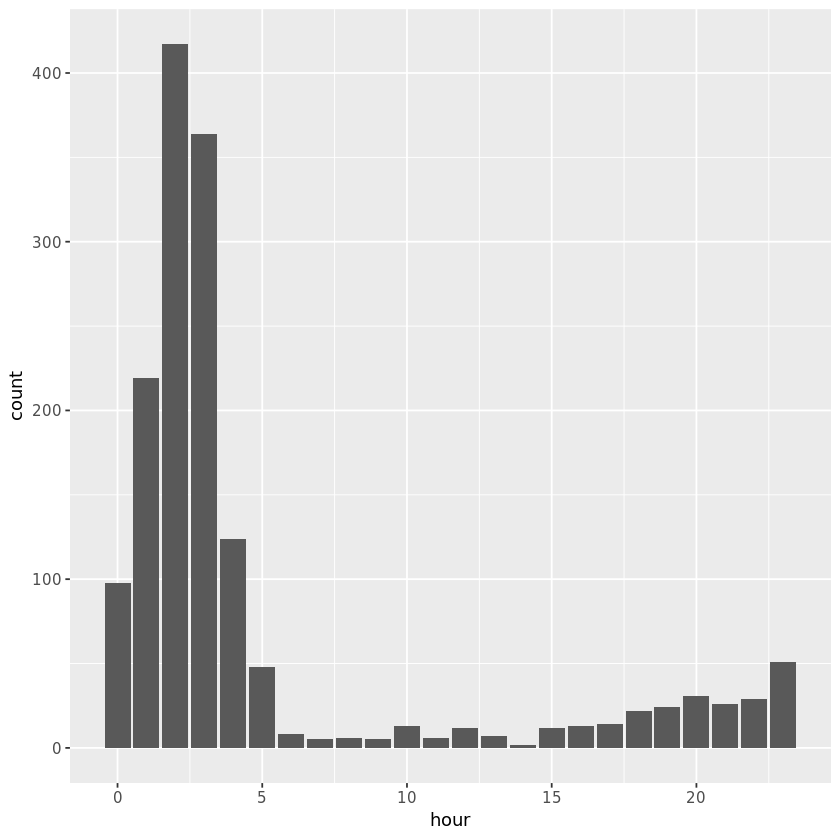

In [24]:
# count by hour and arrange by descending frequency
hourly <- ba_data %>%
            group_by(hour) %>%
            count() %>%
            arrange(desc(n))
head(hourly)

# use a geom_ to create the appropriate bar chart
ggplot(hourly, aes(x = hour, weight = n)) + geom_bar()

## 4. Breathalyzer tests by month
<p>Now that we have discovered which time of day is most common for breath alcohol tests, we will determine which time of the year has the most breathalyzer tests. Which month will have the most recorded tests?</p>

month,n
8,167
4,159
9,146
1,145
3,145
10,135


[1] 8  4  9  1  3  10
Levels: 1 2 3 4 5 6 7 8 9 10 11 12

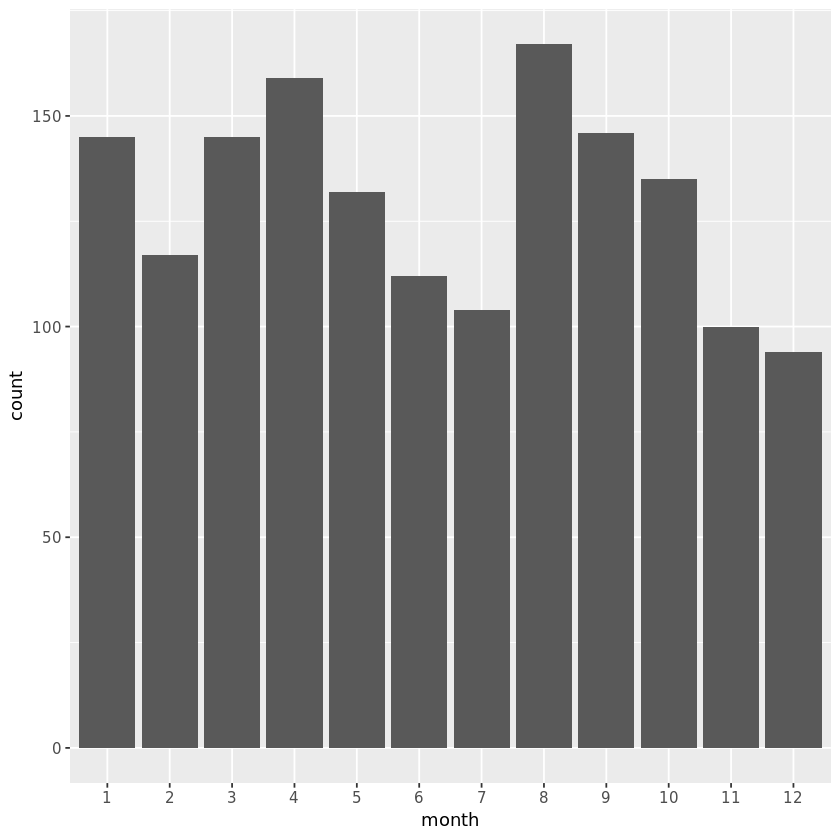

In [26]:
# count by month and arrange by descending frequency
monthly <- ba_data %>%
            group_by(month) %>%
            count() %>%
            arrange(desc(n))
head(monthly)

# make month a factor
monthly$month <- as.factor(monthly$month)
head(monthly$month)

# use a geom_ to create the appropriate bar chart
ggplot(monthly, aes(month, weight = n)) + geom_bar()

## 5. COLLEGE
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/PF2081John-Belushi-College-Posters.jpg" style="float: left;margin:5px 20px 5px 1px"> </p>
<p>When we think of (binge) drinking in college towns in America, we usually think of something like this image at the left. And so, one might suspect that breath alcohol tests are given to men more often than women and that men drink more than women. </p>

gender,n
F,425
M,1102
NA,29


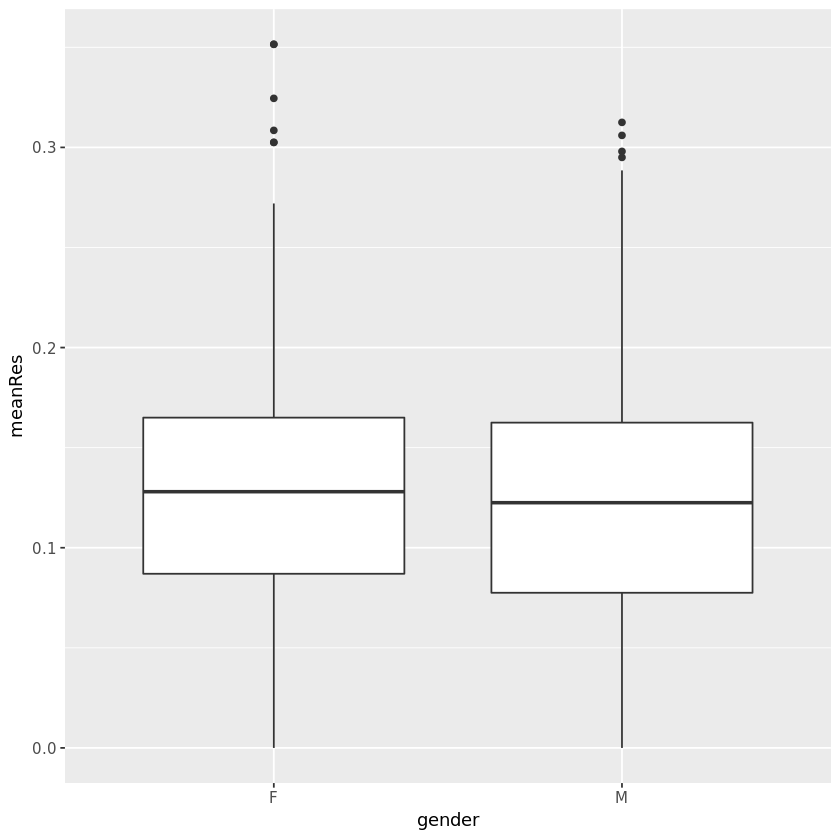

In [28]:
# count by gender 
ba_data %>% group_by(gender) %>% count()

# create a dataset with no NAs in gender 
clean_gender <- ba_data %>% filter(!is.na(gender))

# create a mean test result variable and save as mean_bas
mean_bas <- clean_gender %>% mutate(meanRes = (Res1 + Res2)/2)

# create side-by-side boxplots to compare the mean blood alcohol levels of men and women
ggplot(mean_bas, aes(x = gender, y = meanRes)) + geom_boxplot()

## 6. Above the legal limit
<p>In the USA, it is illegal to drive with a blood alcohol concentration (BAC) above 0.08%. This is the case for <a href="https://www.dmv.org/automotive-law/dui.php">all 50 states</a>. Assuming everyone tested in our data was driving (though we have no way of knowing this from the data), if either of the results (<code>Res1</code>, <code>Res2</code>) are above 0.08, the person would be charged with DUI (driving under the influence). </p>

In [30]:
# Filter the data
duis <- ba_data %>% filter(Res1 > 0.08 | Res2 > 0.08)

# proportion of tests that would have resulted in a DUI
p_dui <- nrow(duis)/nrow(ba_data)
p_dui

[1] 0.7448586

## 7. Breathalyzer tests: is there a pattern over time?
<p>We previously saw that 2am is the most common time of day for breathalyzer tests to be administered, and August is the most common month of the year for breathalyzer tests. Now, we look at the weeks in the year over time. We briefly use the <a href="http://lubridate.tidyverse.org/"><code>lubridate</code></a> package for a bit of date-time manipulation. </p>

In [32]:
library(lubridate) 

# Create date variable using paste() and ymd()
ba_data <- ba_data %>% mutate(date = ymd(paste(year,month,day,sep = '-')))

# Create a week variable using week()
ba_data <- ba_data %>% mutate(week = week(date))
head(ba_data)

year,month,day,hour,location,gender,Res1,Res2,date,week
2017,12,17,1,Ames PD,M,0.046,0.046,2017-12-17,51
2017,12,14,3,ISU PD,F,0.121,0.120,2017-12-14,50
2017,12,10,5,ISU PD,F,0.068,0.067,2017-12-10,50
2017,12,10,3,ISU PD,F,0.077,0.077,2017-12-10,50
2017,12,9,2,ISU PD,M,0.085,0.084,2017-12-09,49
2017,12,9,1,Ames PD,M,0.160,0.161,2017-12-09,49


## 8. Looking at timelines
<p>How do the weeks differ over time? One of the most common data visualizations is the time series, a line tracking the changes in a variable over time. We will use the new <code>week</code> variable to look at test frequency over time. We end with a time series plot showing frequency of breathalyzer tests by week in year, with one line for each year. </p>

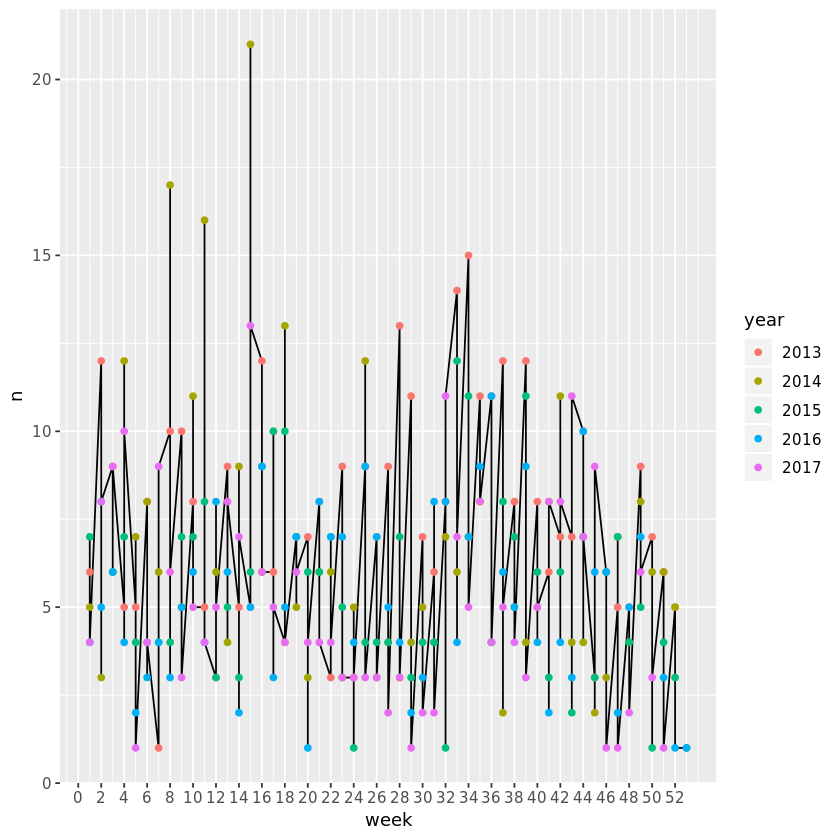

In [34]:
# create the weekly data set 
weekly <- ba_data %>% group_by(year, week) %>% count()

# uncomment and run the following line
weekly <- weekly %>% ungroup() # ungroup is necessary for the plot later

# make year a factor
weekly <- weekly %>% mutate(year = as.factor(year))

# create the time series plot with one line for each year
ggplot(weekly, aes(x = week, y = n)) + 
  geom_line() + 
  geom_point(aes(color = year)) +  # included to make the plot more readable 
  scale_x_continuous(breaks = seq(0,52,2))  # to make the x-axis more readable 

## 9. The end of VEISHEA
<p>From <a href="https://en.wikipedia.org/wiki/VEISHEA">Wikipedia</a>: 
"VEISHEA was an annual week-long celebration held each spring on the campus of Iowa State University in Ames, Iowa. The celebration featured an annual parade and many open-house demonstrations of the university facilities and departments. Campus organizations exhibited products, technologies, and held fundraisers for various charity groups. In addition, VEISHEA brought speakers, lecturers, and entertainers to Iowa State. [...] VEISHEA was the largest student-run festival in the nation, bringing in tens of thousands of visitors to the campus each year."</p>
<p>This over 90-year tradition in Ames was <a href="https://www.news.iastate.edu/news/2014/08/07/veisheaend">terminated permanently</a> after <a href="https://www.desmoinesregister.com/story/news/crime-and-courts/2014/04/09/veishea-ames-car-tipping/7495935/">riots in 2014</a>, where drunk celebrators flipped over multiple vehicles and tore light poles down. This was not the first incidence of violence and severe property damage in VEISHEA's history. Did former President Leath make the right decision?</p>

In [36]:
## Run this code to create the plot 
ggplot() + 
  geom_point(data = weekly, aes(x = week, y = n, color = year)) + 
  geom_line(data = weekly, aes(x = week, y = n, color = year)) +  # included to make the plot more readable 
  geom_segment(data = NULL, arrow = arrow(angle = 20, length = unit(0.1, "inches"),
                                          ends = "last", type = "closed"), 
               aes(x = c(20,20), xend = c(15.5,16), y = c(21, 20), yend = c(21, 12.25))) + 
  geom_text(data = NULL, aes(x = 23, y = 20.5, label = "VEISHEA Weeks"), size = 3) + 
  scale_x_continuous(breaks = seq(0,52,2)) 

## Make a decision about VEISHEA. TRUE or FALSE?  
cancelling_VEISHEA_was_right <- ....

ERROR: Error in eval(expr, envir, enclos): object '....' not found
